# 필요라이브러리설치&압축파일풀기

In [4]:
# 필요한 라이브러리 설치
!pip install soundata pandas librosa plotly matplotlib mutagen pillow tensorflow[and-cuda]==2.15 scikit-learn 

  Using cached tensorflow-2.15.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
  Using cached ml_dtypes-0.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached wrapt-1.14.1-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
  Using cached tensorboard-2.15.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached tensorflow_estimator-2.15.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached nvidia_cublas_cu12-12.2.5.6-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.2.142-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cuda_nvcc_cu12-12.2.140-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.2.140-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.2.1

In [5]:
!pip install tensorflow[and-cuda]==2.13


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [6]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [7]:
# 데이터 다운로드
import soundata

dataset = soundata.initialize('urbansound8k')
dataset.download()  # download the dataset
dataset.validate()  # validate that all the expected files are there

example_clip = dataset.choice_clip()  # choose a random example clip
print(example_clip)  # see the available data


INFO: Downloading ['all', 'index']. Index is being stored in /home/jovyan/.local/lib/python3.10/site-packages/soundata/datasets/indexes, and the rest of files in /home/jovyan/sound_datasets/urbansound8k
INFO: [all] downloading UrbanSound8K.tar.gz
INFO: /home/jovyan/sound_datasets/urbansound8k/UrbanSound8K.tar.gz already exists and will not be downloaded. Rerun with force_overwrite=True to delete this file and force the download.
INFO: /home/jovyan/sound_datasets/urbansound8k/audio already exists. Run with force_overwrite=True to download from scratch
INFO: /home/jovyan/sound_datasets/urbansound8k/metadata already exists. Run with force_overwrite=True to download from scratch
INFO: /home/jovyan/sound_datasets/urbansound8k/UrbanSound8K_README.txt already exists. Run with force_overwrite=True to download from scratch
INFO: /home/jovyan/sound_datasets/urbansound8k/FREESOUNDCREDITS.txt already exists. Run with force_overwrite=True to download from scratch
INFO: [index] downloading urbansoun

Clip(
  audio_path="/home/jovyan/sound_datasets/urbansound8k/audio/fold6/108638-9-0-0.wav",
  clip_id="108638-9-0-0",
  audio: The clip's audio
            * np.ndarray - audio signal
            * float - sample rate,
  class_id: The clip's class id.
            * int - integer representation of the class label (0-9). See Dataset Info in the documentation for mapping,
  class_label: The clip's class label.
            * str - string class name: air_conditioner, car_horn, children_playing, dog_bark, drilling, engine_idling, gun_shot, jackhammer, siren, street_music,
  fold: The clip's fold.
            * int - fold number (1-10) to which this clip is allocated. Use these folds for cross validation,
  freesound_end_time: The clip's end time in Freesound.
            * float - end time in seconds of the clip in the original freesound recording,
  freesound_id: The clip's Freesound ID.
            * str - ID of the freesound.org recording from which this clip was taken,
  freesound_start_

In [8]:
# # import zipfile

# # with zipfile.ZipFile('./UrbanSound8K.tar.gz','r') as zip_ref:
# #     file_list = zip_ref.namelist()

# import tarfile

# with tarfile.open('./UrbanSound8K.tar.gz', "r:gz") as tr:
#     # with tarfile.open('./UrbanSound8K.tar.gz', "r:tar") as tz:
# # for tarinfo in tar:
#     tar.extract(tarinfo, './UrbanSound8K')
#     tr.extractall('./UrbanSound8K/audio')


FileNotFoundError: [Errno 2] No such file or directory: './UrbanSound8K.tar.gz'

# 라이브러리 부르기

In [3]:
import numpy as np
import pandas as pd
import os
import librosa
import librosa.display
import plotly.express as px
import matplotlib.pyplot as plt
import mutagen
from PIL import Image
from tqdm import tqdm
import gc

# 데이터 확인

UrbanSound8K

In [4]:
def create_dataset_df(csv_file):
    dataset_df = pd.read_csv(csv_file)
    filepaths = []
    for i, row in dataset_df.iterrows():
        filepaths.append(os.path.join('/home/jovyan/sound_datasets/urbansound8k/audio/', 'fold'+str(row['fold']), row['slice_file_name']))
    dataset_df['filepath'] = filepaths
    return dataset_df
dataset_df = create_dataset_df('/home/jovyan/sound_datasets/urbansound8k/metadata/UrbanSound8K.csv')
# 데이터의 평균길이
dataset_df['duration'] = dataset_df['end'] - dataset_df['start']
test_file = '/home/jovyan/sound_datasets/urbansound8k/audio/fold5/100263-2-0-117.wav'
home_directory = '/home/jovyan/sound_datasets/urbansound8k/'

y, sr = librosa.load(test_file)

print('Sample rate: ' + str(sr))

Sample rate: 22050


In [5]:
def create_dataset_df(csv_file):
    dataset_df = pd.read_csv(csv_file)
    filepaths = []
    for i, row in dataset_df.iterrows():
        filepaths.append(os.path.join('/home/jovyan/sound_datasets/urbansound8k/audio/', 'fold'+str(row['fold']), row['slice_file_name']))
    dataset_df['filepath'] = filepaths
    return dataset_df

In [4]:
dataset_df = create_dataset_df('/home/jovyan/sound_datasets/urbansound8k/metadata/UrbanSound8K.csv')
dataset_df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class,filepath
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark,/home/jovyan/sound_datasets/urbansound8k/audio...
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing,/home/jovyan/sound_datasets/urbansound8k/audio...
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing,/home/jovyan/sound_datasets/urbansound8k/audio...
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing,/home/jovyan/sound_datasets/urbansound8k/audio...
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing,/home/jovyan/sound_datasets/urbansound8k/audio...


In [5]:
dataset_df.groupby('class').slice_file_name.count()

class
air_conditioner     1000
car_horn             429
children_playing    1000
dog_bark            1000
drilling            1000
engine_idling       1000
gun_shot             374
jackhammer          1000
siren                929
street_music        1000
Name: slice_file_name, dtype: int64

In [6]:
# 데이터의 평균길이
dataset_df['duration'] = dataset_df['end'] - dataset_df['start']
dataset_df['duration'].describe()

count    8732.000000
mean        3.607904
std         0.973570
min         0.054517
25%         4.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: duration, dtype: float64

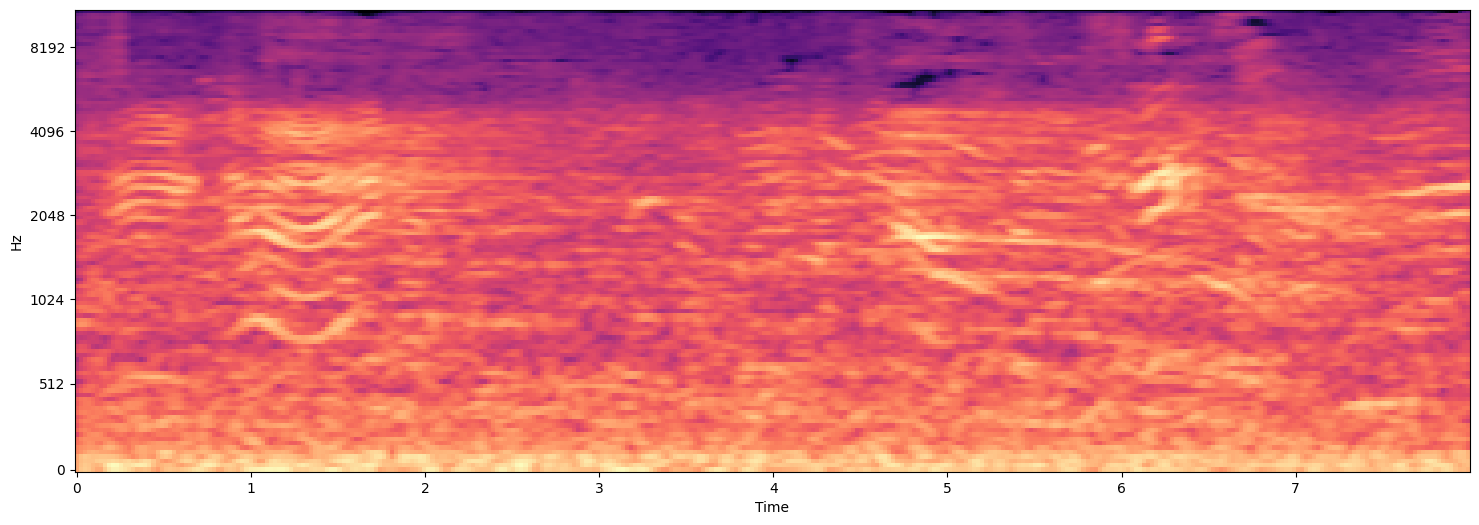

In [7]:
# 멜 스펙트로그램
S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=256, n_mels=128)
Sdb = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(18, 6))
librosa.display.specshow(Sdb, sr=sr, x_axis='time', y_axis='mel')
plt.show()

BabyCry

In [9]:
# zipfile 풀기
import zipfile 

baby_home_directory = '/home/jovyan/sound_datasets/babycry/' # baby 데이터가있는 디렉토리
# file_name = "/home/jovyan/sound_datasets/babycry/archive.zip"

# zip_file = zipfile.ZipFile(file_name)
# zip_file.extractall(path=baby_home_directory)

In [7]:
# sr 확인(urbansound와 같음)

test_file = '/home/jovyan/ototyun-agi-uneun-sori.wav'

audio, sr = librosa.load(test_file)
# file_list = os.listdir(baby_home_directory)
# size = len(file_list)

print('Sample rate: ' + str(sr))
# print(size)

Sample rate: 22050


<Figure size 640x480 with 0 Axes>

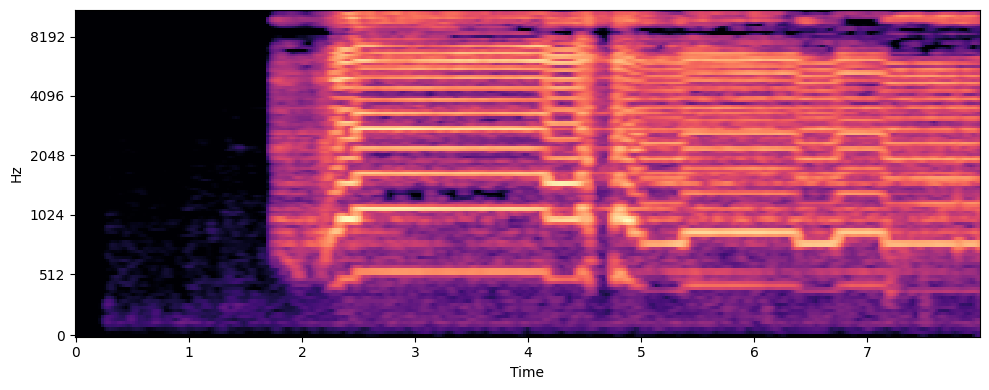

In [9]:
# 멜 스펙트로그램
S = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=2048, hop_length=256, n_mels=128)
Sdb = librosa.power_to_db(S, ref=np.max)

plt.clf()
plt.figure(figsize=(10, 4))

librosa.display.specshow(Sdb, sr=sr, x_axis='time', y_axis='mel')
plt.tight_layout()
plt.savefig('./babytest', bbox_inches='tight', pad_inches=0)
plt.show()

유튜브에서 소리 추출해서 전처리

Sample rate: 22050


<Figure size 640x480 with 0 Axes>

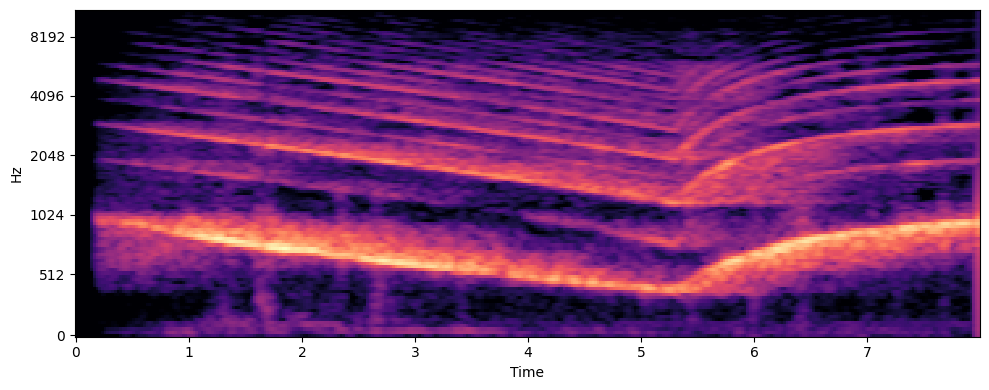

In [6]:
# 유튜브에서 가져온 소리 처리
siren_test = '/home/jovyan/gyeongcal-sairen-sori (1).wav' 

audio, sr = librosa.load(siren_test)
print('Sample rate: ' + str(sr))

S = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=2048, hop_length=256, n_mels=128)
Sdb = librosa.power_to_db(S, ref=np.max)

plt.clf()
plt.figure(figsize=(10, 4))

librosa.display.specshow(Sdb, sr=sr, x_axis='time', y_axis='mel')
plt.tight_layout()
plt.savefig('./sirentest', bbox_inches='tight', pad_inches=0)
plt.show()

# 함수정의

In [3]:
# 함수정의

# 오디오 신호 시간대 맞추기
def load_audio(file_name):
    y, sr = librosa.load(file_name)
    # 오디오 신호의 시작과 끝의 정적인 소음 제거
    yt, index = librosa.effects.trim(y, top_db=20)       

    # 4초로 맞추기
    if len(yt) > (sr*4):
        yt = yt[:(sr*4)]
    else:
        padding = (sr*4) - len(yt)
        offset = padding // 2
        yt = np.pad(yt, (offset, (sr*4) - len(yt) - offset), 'constant')
  
    return yt

# mel처리하는 코드 -> 특징의 평균값 반환
def features_extractor(file):
    audio, sr = librosa.load(file_name) 
    mel_features = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=2048, hop_length=256, n_mels=128)
    mel_scaled_features = librosa.power_to_db(mel_features, ref=np.max)
    
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_scaled_features, sr=sr, x_axis='time', y_axis='mel')
    
    base_name = os.path.basename(file).replace('.wav', '.png')
    plt.savefig(f'./mel1/{base_name}', bbox_inches='tight', pad_inches=0)
    plt.close()
    
    return mel_scaled_features
    

    # mel_scaled_features = np.mean(mel_features.T,axis=0) # 1차원배열로 반환 -> cnn에 알맞지 않음
    # mel_scaled_features = mel_features.T # 2차원배열로 반환(n_mels, n_frames)
    # return mel_scaled_features

In [4]:
# 멜 처리할 때부터 클래스번호를 지정해주기(babycry에만 적용하기)
def features_extractor_r(file, file_index):
    audio = load_audio(file)
    mel_features = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=2048, hop_length=256, n_mels=128)
    mel_scaled_features = librosa.power_to_db(mel_features, ref=np.max)
    
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_scaled_features, sr=sr, x_axis='time', y_axis='mel')

    filename = f"{file_index}babycry-10-.png"
    save_path = os.path.join('', filename)
    plt.savefig(f'./mel/{filename}', bbox_inches='tight', pad_inches=0)
    plt.close()
    
    return mel_scaled_features

In [10]:
sound_dic = {
    'air_conditioner':'0',
    'car_horn':'1',
    'children_playing':'2',
    'dog_bark':'3',
    'drilling':'4',
    'engine_idling':'5',
    'gun_shot':'6',
    'jackhammer':'7',
    'siren':'8',
    'street_musics':'9'
}
# extracted_features_df['class_id'] = extracted_features_df['class'].map(sound_dic)

# # X=np.array(extracted_features_df['feature']) # shape = (8732, 128)
# y=np.array(extracted_features_df['class_id'])

# print(y)

# 전처리

In [11]:
# UrbanSound8K 오디오 파일에 대한 mel 추출
audio_dataset_path= '/home/jovyan/sound_datasets/urbansound8k/audio/'
extracted_features=[]
metadata = pd.read_csv('/home/jovyan/sound_datasets/urbansound8k/metadata/UrbanSound8K.csv')
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    
    final_class_labels=row["class"]
    
    # pre_data = load_audio(file_name)
    data=features_extractor(file_name) # ParameterError: Audio data must be floating-point 에러가 가끔 발생함
    extracted_features.append([data,final_class_labels])

0it [00:00, ?it/s]


NameError: name 'features_extractor' is not defined

In [14]:
import gc

# 한 폴더의 경로 설정 (예: fold1)
baby_fold = '/home/jovyan/sound_datasets/babycry'

# 폴더 내 모든 파일 목록 가져오기
audio_files = [f for f in os.listdir(baby_fold) if f.endswith('.wav')]

extracted_features = []

# 파일 인덱스 초기화
file_index = 0

#진행상황을 보기 위해 tqdm 추가
for file_name in tqdm(audio_files, total=len(audio_files)):
    file_path = os.path.join(baby_fold, file_name) # 파일 전체 경로
    try:
        baby_data = features_extractor_r(file_path, file_index)
        extracted_features.append(baby_data)
        file_index += 1
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
    # 메모리 정리
    del baby_data
    gc.collect()

100%|██████████| 457/457 [08:27<00:00,  1.11s/it]


# CNN

## 9개 클래스를 가지고 있는 cnn

In [123]:
# import os
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# import matplotlib.pyplot as plt
# import time

# # 전체 코드 실행 시작 시간 기록
# overall_start_time = time.time()
# print(f"시작 시간: {time.ctime(overall_start_time)}")

# # 데이터 디렉토리 설정
# data_directory = '/home/jovyan/mel/'  # 멜 스펙트로그램 데이터 디렉토리 경로

# # 이미지 크기 및 하이퍼파라미터 설정
# img_height, img_width = 64, 64  # 이미지 크기 설정 (64x64)
# batch_size = 34  # 배치 크기 설정
# epochs = 50  # 학습 에포크 수 설정
# num_classes = 10  # 클래스 수 설정 (babycry, boil, carhorn 등 총 9개 클래스)

# # CNN 모델 정의 함수
# def create_cnn_model(input_shape, num_classes):
#     """
#     CNN 모델 생성 함수
#     Args:
#     - input_shape: 입력 이미지의 형태 (높이, 너비, 채널 수)
#     - num_classes: 분류할 클래스 수
#     Returns:
#     - Sequential로 구성된 CNN 모델
#     """
#     model = Sequential([
#         Input(shape=input_shape),  # 첫 번째 입력 레이어
#         Conv2D(16, (3, 3), activation='relu'),  # 첫 번째 컨볼루션 레이어 (필터 수 축소)
#         MaxPooling2D((2, 2)),  # 첫 번째 풀링 레이어
#         Conv2D(32, (3, 3), activation='relu'),  # 두 번째 컨볼루션 레이어 (필터 수 축소)
#         MaxPooling2D((2, 2)),  # 두 번째 풀링 레이어
#         Conv2D(64, (3, 3), activation='relu'),  # 세 번째 컨볼루션 레이어 (필터 수 축소)
#         MaxPooling2D((2, 2)),  # 세 번째 풀링 레이어
#         Flatten(),  # 평탄화 레이어
#         Dense(128, activation='relu'),  # 완전 연결 레이어
#         Dropout(0.5),  # 드롭아웃 레이어 (과적합 방지)
#         Dense(num_classes, activation='softmax')  # 출력 레이어 (클래스 수만큼 노드)
#     ])
#     model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])  # 모델 컴파일
#     return model


# # 데이터셋 준비
# X_data = []  # 이미지 데이터 배열 # data_directory['feature']
# y_data = [] # 레이블 배열 # data_dirctory['class_id'] -> 딕셔너리 만들어서 숫자로 배당....?

# # 데이터 디렉토리에서 이미지 파일을 불러와서 리스트에 추가
# for filename in os.listdir(data_directory):
#     if filename.endswith('.png'):  # PNG 파일만 처리
#         # 클래스 번호 추출 (파일명에서 첫 번째 요소를 추출)
#         class_number = filename.split('-')[1]
#         # 이미지 파일 경로 설정
#         img_path = os.path.join(data_directory, filename)
#         # 이미지 불러오기 및 전처리
#         img = load_img(img_path, target_size=(img_height, img_width))  # 이미지 로드 및 크기 조정
#         img_array = img_to_array(img) / 255.0  # 이미지를 배열로 변환 및 정규화
#         X_data.append(img_array)  # 이미지 배열을 X_data 리스트에 추가
#         y_data.append(class_number)  # 클래스 번호를 y_data 리스트에 추가

# # 리스트를 numpy 배열로 변환
# X_data = np.array(X)
# y_data = np.array(y)

# # 클래스 번호를 원-핫 인코딩
# y_data = to_categorical(y_data, num_classes)

# # 데이터셋을 학습 세트와 테스트 세트로 나누기
# X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# # CNN 모델 생성
# model = create_cnn_model((img_height, img_width, 3), num_classes)


# # 체크포인트 정의
# checkpoint = ModelCheckpoint("weights.h5", 
#                               monitor='val_accuracy', 
#                               verbose=1, 
#                               save_best_only=True, 
#                               mode='max', 
#                               save_weights_only=True)


# # 모델 학습
# history = model.fit(
#     X_train, y_train,  # 학습 데이터와 레이블
#     epochs=epochs,  # 학습 에포크 수
#     batch_size=batch_size,  # 배치 크기
#     validation_split=0.2,  # 학습 데이터의 20%를 검증 데이터로 사용
#     callbacks=[checkpoint]  # 콜백 추가
# )

# model.save('model.h5')


시작 시간: Wed Jul 31 09:44:44 2024


ValueError: invalid literal for int() with base 10: '134717-0-0-14.png'

In [ ]:
# h5로 저장
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint
import time

# 전체 코드 실행 시작 시간 기록
overall_start_time = time.time()
print(f"시작 시간: {time.ctime(overall_start_time)}")

# 데이터 디렉토리 설정
data_directory = '/home/jovyan/mel/'  # 멜 스펙트로그램 데이터 디렉토리 경로

# 이미지 크기 및 하이퍼파라미터 설정
img_height, img_width = 1000, 400  # 이미지 크기 설정 (64x64)
batch_size = 34  # 배치 크기 설정
epochs = 50  # 학습 에포크 수 설정
num_classes = 10  # 클래스 수 설정 (총 9개 클래스)

# CNN 모델 정의 함수
def create_cnn_model(input_shape, num_classes):
    """
    CNN 모델 생성 함수
    Args:
    - input_shape: 입력 이미지의 형태 (높이, 너비, 채널 수)
    - num_classes: 분류할 클래스 수
    Returns:
    - Sequential로 구성된 CNN 모델
    """
    model = Sequential([
        Input(shape=input_shape),  # 첫 번째 입력 레이어
        Conv2D(16, (3, 3), activation='relu'),  # 첫 번째 컨볼루션 레이어 (필터 수 축소)
        MaxPooling2D((2, 2)),  # 첫 번째 풀링 레이어
        Conv2D(32, (3, 3), activation='relu'),  # 두 번째 컨볼루션 레이어 (필터 수 축소)
        MaxPooling2D((2, 2)),  # 두 번째 풀링 레이어
        Conv2D(64, (3, 3), activation='relu'),  # 세 번째 컨볼루션 레이어 (필터 수 축소)
        MaxPooling2D((2, 2)),  # 세 번째 풀링 레이어
        Flatten(),  # 평탄화 레이어
        Dense(128, activation='relu'),  # 완전 연결 레이어
        Dropout(0.5),  # 드롭아웃 레이어 (과적합 방지)
        Dense(num_classes, activation='softmax')  # 출력 레이어 (클래스 수만큼 노드)
    ])
    # 모델 컴파일
    model.compile(optimizer='adam',
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

    return model


# 데이터셋 준비
X_data = []  # 이미지 데이터 배열 # data_directory['feature']
y_data = [] # 레이블 배열 # data_dirctory['class_id'] -> 딕셔너리 만들어서 숫자로 배당....?
print(0)
# 데이터 디렉토리에서 이미지 파일을 불러와서 리스트에 추가
for filename in os.listdir(data_directory):
    if filename.endswith('.png'):  # PNG 파일만 처리
        # 클래스 번호 추출 (파일명에서 첫 번째 요소를 추출)
        class_number = filename.split('-')[1]
        # 이미지 파일 경로 설정
        img_path = os.path.join(data_directory, filename)
        # 이미지 불러오기 및 전처리
        img = load_img(img_path, target_size=(img_height, img_width))  # 이미지 로드 및 크기 조정
        img_array = img_to_array(img) / 255.0  # 이미지를 배열로 변환 및 정규화
        X_data.append(img_array)  # 이미지 배열을 X_data 리스트에 추가
        y_data.append(class_number)  # 클래스 번호를 y_data 리스트에 추가

# 리스트를 numpy 배열로 변환
X_data = np.array(X_data)
y_data = np.array(y_data)

# 클래스 번호를 원-핫 인코딩
y_data = to_categorical(y_data, num_classes)

# 데이터셋을 학습 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# CNN 모델 생성
model = create_cnn_model((img_height, img_width, 3), num_classes)

print(1)
# 체크포인트 정의
checkpoint = ModelCheckpoint("weights.h5", 
                              monitor='val_accuracy', 
                              verbose=1, 
                              save_best_only=True, 
                              mode='max', 
                              save_weights_only=True)

print(2)
# 모델 학습
history = model.fit(
    X_train, y_train,  # 학습 데이터와 레이블
    epochs=epochs,  # 학습 에포크 수
    batch_size=batch_size,  # 배치 크기
    validation_split=0.2,  # 학습 데이터의 20%를 검증 데이터로 사용
    callbacks=[checkpoint]  # 콜백 추가
)
print(3)
model.save('model.h5')


# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)  # 테스트 데이터로 모델 평가
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")  # 평가 결과 출력

# 예측 및 성능 평가
Y_pred = model.predict(X_test)  # 테스트 데이터로 예측 수행
y_pred = np.argmax(Y_pred, axis=1)  # 예측된 클래스 라벨
y_true = np.argmax(y_test, axis=1)  # 실제 클래스 라벨

# 성능 보고서 및 혼동 행렬 출력
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=[str(i) for i in range(num_classes)]))  # 분류 보고서 출력
print("Confusion Matrix:\n")
print(confusion_matrix(y_true, y_pred))  # 혼동 행렬 출력

# # 가중치 저장
# fname = "weights-Test-CNN.hdf5"
# model.save_weights(fname, overwirte=True)

# 전체 코드 실행 종료 시간 기록
overall_end_time = time.time()
print(f"종료 시간: {time.ctime(overall_end_time)}")
print(f"소요 시간: {overall_end_time - overall_start_time:.2f}초")

# 학습 곡선 시각화
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # 손실
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # 정확도
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# 학습 곡선 출력
plot_history(history)

2024-07-31 15:45:02.127002: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-31 15:45:02.639989: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-31 15:45:04.798293: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


시작 시간: Wed Jul 31 15:45:07 2024
0


## 특정클래스만 학습하고 교차검증까지(baby X)

시작 시간: Thu Aug  1 08:38:02 2024
Epoch 1/20


E0000 00:00:1722501498.749050  149734 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1722501498.897626  149734 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1722501499.916243  149734 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1722501500.187833  149734 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


22/23 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5212 - loss: 1.6534

E0000 00:00:1722501505.486098  149736 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1722501505.633835  149736 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1722501506.519978  149736 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1722501506.794461  149736 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 600ms/step - accuracy: 0.5324 - loss: 1.6027 - val_accuracy: 0.8513 - val_loss: 0.4256
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8158 - loss: 0.4764 - val_accuracy: 0.9641 - val_loss: 0.2380
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9103 - loss: 0.2635 - val_accuracy: 0.9744 - val_loss: 0.1155
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9524 - loss: 0.1746 - val_accuracy: 0.9692 - val_loss: 0.1032
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9325 - loss: 0.1747 - val_accuracy: 0.9692 - val_loss: 0.1446
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9364 - loss: 0.1916 - val_accuracy: 0.9692 - val_loss: 0.0740
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9529 - loss: 0.1320 - val_accuracy: 0.9692 - val_loss: 0.0729
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9294 - loss: 0.1467 - val_accuracy: 0.9744 - val_loss: 

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.9950 - loss: 0.0447
Test Loss: 0.056915007531642914, Test Accuracy: 0.9928057789802551
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        56
           1       1.00      1.00      1.00       202
           2       0.99      1.00      0.99       159

    accuracy                           0.99       417
   macro avg       0.99      0.98      0.99       417
weighted avg       0.99      0.99      0.99       417

Confusion Matrix:

[[ 53   1   2]
 [  0 202   0]
 [  0   0 159]]
종료 시간: Thu Aug  1 08:39:07 2024
소요 시간: 65.00초


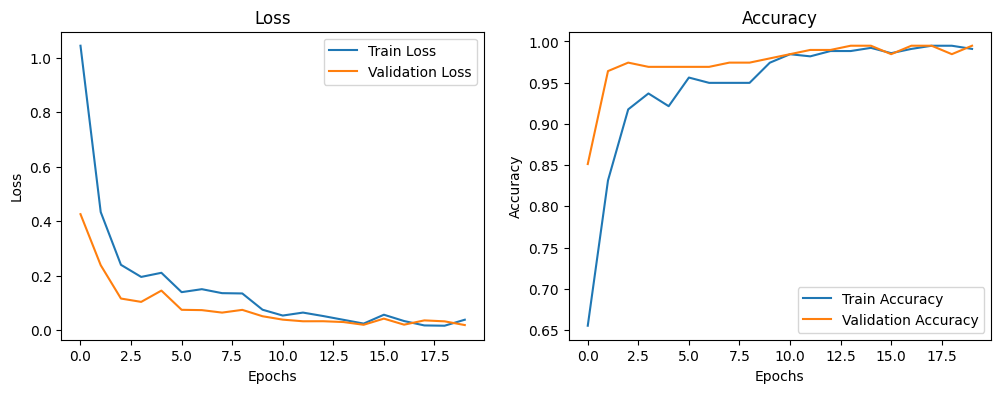

In [5]:
# 특정클래스만 학습
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint
import time

# 전체 코드 실행 시작 시간 기록
overall_start_time = time.time()
print(f"시작 시간: {time.ctime(overall_start_time)}")

# 데이터 디렉토리 설정
data_directory = '/home/jovyan/mel/'  # 멜 스펙트로그램 데이터 디렉토리 경로

# 이미지 크기 및 하이퍼파라미터 설정
img_height, img_width = 500, 200  # 이미지 크기 설정 (64x64)
batch_size = 34  # 배치 크기 설정
epochs = 20  # 학습 에포크 수 설정
num_classes = 3  # 클래스 수 설정 (총 9개 클래스)

# 클래스 번호 매핑
class_mapping = {'1': 0, '7': 1, '8': 2}

# CNN 모델 정의 함수
def create_cnn_model(input_shape, num_classes):
    """
    CNN 모델 생성 함수
    Args:
    - input_shape: 입력 이미지의 형태 (높이, 너비, 채널 수)
    - num_classes: 분류할 클래스 수
    Returns:
    - Sequential로 구성된 CNN 모델
    """
    model = Sequential([
        Input(shape=input_shape),  # 첫 번째 입력 레이어
        Conv2D(16, (3, 3), activation='relu'),  # 첫 번째 컨볼루션 레이어 (필터 수 축소)
        MaxPooling2D((2, 2)),  # 첫 번째 풀링 레이어
        Conv2D(32, (3, 3), activation='relu'),  # 두 번째 컨볼루션 레이어 (필터 수 축소)
        MaxPooling2D((2, 2)),  # 두 번째 풀링 레이어
        Conv2D(64, (3, 3), activation='relu'),  # 세 번째 컨볼루션 레이어 (필터 수 축소)
        MaxPooling2D((2, 2)),  # 세 번째 풀링 레이어
        Flatten(),  # 평탄화 레이어
        Dense(128, activation='relu'),  # 완전 연결 레이어
        Dropout(0.5),  # 드롭아웃 레이어 (과적합 방지)
        Dense(num_classes, activation='softmax')  # 출력 레이어 (클래스 수만큼 노드)
    ])
    # 모델 컴파일
    model.compile(optimizer='adam',
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

    return model


# 데이터셋 준비
X_data = []  # 이미지 데이터 배열 # data_directory['feature']
y_data = [] # 레이블 배열 # data_dirctory['class_id'] -> 딕셔너리 만들어서 숫자로 배당....?

# 데이터 디렉토리에서 이미지 파일을 불러와서 리스트에 추가
for filename in os.listdir(data_directory):
    if filename.endswith('.png'):  # PNG 파일만 처리
        # 클래스 번호 추출 (파일명에서 첫 번째 요소를 추출)
        class_number = filename.split('-')[1]
        if class_number in class_mapping : 
            # 이미지 파일 경로 설정
            img_path = os.path.join(data_directory, filename)
            # 이미지 불러오기 및 전처리
            img = load_img(img_path, target_size=(img_height, img_width))  # 이미지 로드 및 크기 조정
            img_array = img_to_array(img) / 255.0  # 이미지를 배열로 변환 및 정규화
            X_data.append(img_array)  # 이미지 배열을 X_data 리스트에 추가
            y_data.append(class_mapping[class_number])  # 클래스 번호를 y_data 리스트에 추가
        else : 
            pass

# 리스트를 numpy 배열로 변환
X_data = np.array(X_data)
y_data = np.array(y_data)

# 클래스 번호를 원-핫 인코딩
y_data = to_categorical(y_data, num_classes)

# 데이터셋을 학습 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# CNN 모델 생성
model = create_cnn_model((img_height, img_width, 3), num_classes)


# # 체크포인트 정의
# checkpoint = ModelCheckpoint("weights.h5", 
#                               monitor='val_accuracy', 
#                               verbose=1, 
#                               save_best_only=True, 
#                               mode='max', 
#                               save_weights_only=True)


# 모델 학습
history = model.fit(
    X_train, y_train,  # 학습 데이터와 레이블
    epochs=epochs,  # 학습 에포크 수
    batch_size=batch_size,  # 배치 크기
    validation_split=0.2,  # 학습 데이터의 20%를 검증 데이터로 사용
    # callbacks=[checkpoint]  # 콜백 추가
)

model.save('model.h5')


# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)  # 테스트 데이터로 모델 평가
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")  # 평가 결과 출력

# 예측 및 성능 평가
Y_pred = model.predict(X_test)  # 테스트 데이터로 예측 수행
y_pred = np.argmax(Y_pred, axis=1)  # 예측된 클래스 라벨
y_true = np.argmax(y_test, axis=1)  # 실제 클래스 라벨

# 성능 보고서 및 혼동 행렬 출력
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=[str(i) for i in range(num_classes)]))  # 분류 보고서 출력
print("Confusion Matrix:\n")
print(confusion_matrix(y_true, y_pred))  # 혼동 행렬 출력

# # 가중치 저장
# fname = "weights-Test-CNN.hdf5"
# model.save_weights(fname, overwirte=True)

# 전체 코드 실행 종료 시간 기록
overall_end_time = time.time()
print(f"종료 시간: {time.ctime(overall_end_time)}")
print(f"소요 시간: {overall_end_time - overall_start_time:.2f}초")

# 학습 곡선 시각화
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # 손실
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # 정확도
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# 학습 곡선 출력
plot_history(history)

In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=[str(i) for i in range(num_classes)]))
print("Confusion Matrix:\n")
print(confusion_matrix(y_true, y_pred))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9950 - loss: 0.0447
Test Loss: 0.056915007531642914, Test Accuracy: 0.9928057789802551
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        56
           1       1.00      1.00      1.00       202
           2       0.99      1.00      0.99       159

    accuracy                           0.99       417
   macro avg       0.99      0.98      0.99       417
weighted avg       0.99      0.99      0.99       417

Confusion Matrix:

[[ 53   1   2]
 [  0 202   0]
 [  0   0 159]]


In [7]:
from sklearn.model_selection import KFold
k = 5  # 폴드 수 설정
kf = KFold(n_splits=k, shuffle=True, random_state=42)

fold_no = 1
results = []

for train_index, val_index in kf.split(X_data):
    print(f'Fold {fold_no}')
    
    X_train, X_val = X_data[train_index], X_data[val_index]
    y_train, y_val = y_data[train_index], y_data[val_index]

    model = create_cnn_model((img_height, img_width, 3), num_classes)
    
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val, y_val)
    )
    
    val_loss, val_acc = model.evaluate(X_val, y_val)
    print(f'Validation Loss: {val_loss}')
    print(f'Validation Accuracy: {val_acc}')
    results.append((val_loss, val_acc))
    
    fold_no += 1

# 교차 검증 결과 출력
average_val_loss = np.mean([result[0] for result in results])
average_val_acc = np.mean([result[1] for result in results])
print(f'Average Validation Loss: {average_val_loss}')
print(f'Average Validation Accuracy: {average_val_acc}')


Fold 1
Epoch 1/20
31/33 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5706 - loss: 2.2807

E0000 00:00:1722501603.113200  149738 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1722501603.259723  149738 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1722501603.963417  149738 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1722501604.236273  149738 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


33/33 ━━━━━━━━━━━━━━━━━━━━ 17s 440ms/step - accuracy: 0.5837 - loss: 2.1841 - val_accuracy: 0.8489 - val_loss: 0.4011
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.8421 - loss: 0.4377 - val_accuracy: 0.8669 - val_loss: 0.3044
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.8894 - loss: 0.3071 - val_accuracy: 0.9388 - val_loss: 0.1599
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9325 - loss: 0.1760 - val_accuracy: 0.9460 - val_loss: 0.1249
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9523 - loss: 0.1521 - val_accuracy: 0.9388 - val_loss: 0.1605
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9519 - loss: 0.1746 - val_accuracy: 0.9568 - val_loss: 0.1115
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9711 - loss: 0.0970 - val_accuracy: 0.9640 - val_loss: 0.0756
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9682 - loss: 0.0755 - val_accuracy: 0.9748 - val_loss: 

E0000 00:00:1722501827.147723  149737 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1722501827.294294  149737 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1722501828.005045  149737 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1722501828.277678  149737 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


33/33 ━━━━━━━━━━━━━━━━━━━━ 18s 465ms/step - accuracy: 0.5991 - loss: 1.4373 - val_accuracy: 0.8736 - val_loss: 0.3680
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.8584 - loss: 0.3993 - val_accuracy: 0.9278 - val_loss: 0.2236
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.8942 - loss: 0.3076 - val_accuracy: 0.9603 - val_loss: 0.1440
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9378 - loss: 0.1734 - val_accuracy: 0.9495 - val_loss: 0.1232
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9470 - loss: 0.1344 - val_accuracy: 0.9675 - val_loss: 0.0881
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9566 - loss: 0.1234 - val_accuracy: 0.9531 - val_loss: 0.1141
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9443 - loss: 0.1318 - val_accuracy: 0.9783 - val_loss: 0.0548
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9710 - loss: 0.0875 - val_accuracy: 0.9819 - val_loss: 

## babycry 추가

### 사용 안하는 코드

In [6]:

# import os
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# import matplotlib.pyplot as plt
# from tensorflow.keras.callbacks import ModelCheckpoint
# import time

# # 데이터 디렉토리 설정
# data_directory = '/home/jovyan/mel/'  # 멜 스펙트로그램 데이터 디렉토리 경로

# # 이미지 크기 및 하이퍼파라미터 설정
# img_height, img_width = 500, 200  # 이미지 크기 설정 (500x200)
# batch_size = 34  # 배치 크기 설정
# epochs = 30  # 학습 에포크 수 설정
# num_classes = 4  # 클래스 수 설정 (총 4개 클래스)

# # 클래스 번호 매핑
# class_mapping = {'1': 0, '7': 1, '8': 2, '10': 3}

# # CNN 모델 정의 함수
# def create_cnn_model(input_shape, num_classes):
#     """
#     CNN 모델 생성 함수
#     Args:
#     - input_shape: 입력 이미지의 형태 (높이, 너비, 채널 수)
#     - num_classes: 분류할 클래스 수
#     Returns:
#     - Sequential로 구성된 CNN 모델
#     """
#     model = Sequential([
#         Input(shape=input_shape),  # 첫 번째 입력 레이어
#         Conv2D(16, (3, 3), activation='relu'),  # 첫 번째 컨볼루션 레이어
#         MaxPooling2D((2, 2)),  # 첫 번째 풀링 레이어
#         Conv2D(32, (3, 3), activation='relu'),  # 두 번째 컨볼루션 레이어
#         MaxPooling2D((2, 2)),  # 두 번째 풀링 레이어
#         Conv2D(64, (3, 3), activation='relu'),  # 세 번째 컨볼루션 레이어
#         MaxPooling2D((2, 2)),  # 세 번째 풀링 레이어
#         Flatten(),  # 평탄화 레이어
#         Dense(128, activation='relu'),  # 완전 연결 레이어
#         Dropout(0.5),  # 드롭아웃 레이어 (과적합 방지)
#         Dense(num_classes, activation='softmax')  # 출력 레이어 (클래스 수만큼 노드)
#     ])
#     # 모델 컴파일
#     model.compile(optimizer='adam',
#                   loss=tf.keras.losses.CategoricalCrossentropy(),
#                   metrics=['accuracy'])
#     return model

# # 데이터셋 준비
# X_data = []  # 이미지 데이터 배열
# y_data = []  # 레이블 배열

# # 데이터 디렉토리에서 이미지 파일을 불러와서 리스트에 추가
# for filename in os.listdir(data_directory):
#     if filename.endswith('.png'):  # PNG 파일만 처리
#         # 클래스 번호 추출 (파일명에서 첫 번째 요소를 추출)
#         class_number = filename.split('-')[1]
#         if class_number in class_mapping:
#             # 이미지 파일 경로 설정
#             img_path = os.path.join(data_directory, filename)
#             # 이미지 불러오기 및 전처리
#             img = load_img(img_path, target_size=(img_height, img_width))  # 이미지 로드 및 크기 조정
#             img_array = img_to_array(img) / 255.0  # 이미지를 배열로 변환 및 정규화
#             X_data.append(img_array)  # 이미지 배열을 X_data 리스트에 추가
#             y_data.append(class_mapping[class_number])  # 클래스 번호를 y_data 리스트에 추가

# # 리스트를 numpy 배열로 변환
# X_data = np.array(X_data)
# y_data = np.array(y_data)

# # 클래스 번호를 원-핫 인코딩
# y_data = to_categorical(y_data, num_classes)

# # 데이터셋을 학습 세트와 테스트 세트로 나누기
# X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# # CNN 모델 생성
# model = create_cnn_model((img_height, img_width, 3), num_classes)

# # 체크포인트 정의
# checkpoint = ModelCheckpoint("b_weights.h5",
#                              monitor='val_accuracy',
#                              verbose=1,
#                              save_best_only=True,
#                              mode='max',
#                              save_weights_only=True)

# # 모델 학습
# history = model.fit(
#     X_train, y_train,  # 학습 데이터와 레이블
#     epochs=epochs,  # 학습 에포크 수
#     batch_size=batch_size,  # 배치 크기
#     validation_split=0.2,  # 학습 데이터의 20%를 검증 데이터로 사용
#     callbacks=[checkpoint]  # 콜백 추가
# )

# model.save('b_model.h5')

# # 모델 평가
# test_loss, test_acc = model.evaluate(X_test, y_test)  # 테스트 데이터로 모델 평가
# print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")  # 평가 결과 출력

# # 예측 및 성능 평가
# Y_pred = model.predict(X_test)  # 테스트 데이터로 예측 수행
# y_pred = np.argmax(Y_pred, axis=1)  # 예측된 클래스 라벨
# y_true = np.argmax(y_test, axis=1)  # 실제 클래스 라벨

# # 실제 클래스 수 확인
# unique_classes = np.unique(y_true)
# num_unique_classes = len(unique_classes)

# # 성능 보고서 및 혼동 행렬 출력
# print("Classification Report:\n")
# print(classification_report(y_true, y_pred, target_names=[str(i) for i in range(num_classes)]))  # 분류 보고서 출력
# print("Confusion Matrix:\n")
# print(confusion_matrix(y_true, y_pred))  # 혼동 행렬 출력


# # 학습 곡선 시각화
# def plot_history(history):
#     plt.figure(figsize=(12, 4))

#     # 손실
#     plt.subplot(1, 2, 1)
#     plt.plot(history.history['loss'], label='Train Loss')
#     plt.plot(history.history['val_loss'], label='Validation Loss')
#     plt.title('Loss')
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.legend()

#     # 정확도
#     plt.subplot(1, 2, 2)
#     plt.plot(history.history['accuracy'], label='Train Accuracy')
#     plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#     plt.title('Accuracy')
#     plt.xlabel('Epochs')
#     plt.ylabel('Accuracy')
#     plt.legend()

#     plt.show()

# # 학습 곡선 출력
# plot_history(history)


2024-08-01 00:17:58.013706: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-01 00:17:58.525473: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


KeyboardInterrupt: 

### 찐 코드

2024-08-01 03:08:00.003236: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-01 03:08:00.389308: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-01 03:08:00.522765: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-01 03:08:00.563230: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-01 03:08:00.913683: I tensorflow/core/platform/cpu_feature_guar

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


I0000 00:00:1722481714.671945  149521 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722481714.674168  149521 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722481714.676092  149521 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722481714.898237  149521 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Epoch 1/100


I0000 00:00:1722481723.366443  149738 service.cc:146] XLA service 0x7f17d0005380 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1722481723.366536  149738 service.cc:154]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-08-01 03:08:44.196212: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-01 03:08:44.596691: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
E0000 00:00:1722481730.303047  149738 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1722481730.627381  149738 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


 1/21 ━━━━━━━━━━━━━━━━━━━━ 6:14 19s/step - accuracy: 0.1562 - loss: 1.4317

I0000 00:00:1722481739.308412  149738 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.3853 - loss: 4.0560

E0000 00:00:1722481745.270581  149737 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1722481745.583356  149737 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 576ms/step - accuracy: 0.3944 - loss: 3.9717
Epoch 1: val_accuracy improved from -inf to 0.88649, saving model to b_model_max.weights.h5
21/21 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.4027 - loss: 3.8951 - val_accuracy: 0.8865 - val_loss: 0.3200
Epoch 2/100
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.8603 - loss: 0.4231
Epoch 2: val_accuracy improved from 0.88649 to 0.96216, saving model to b_model_max.weights.h5
21/21 ━━━━━━━━━━━━━━━━━━━━ 47s 266ms/step - accuracy: 0.8618 - loss: 0.4183 - val_accuracy: 0.9622 - val_loss: 0.1625
Epoch 3/100
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.9391 - loss: 0.1735
Epoch 3: val_accuracy improved from 0.96216 to 0.96757, saving model to b_model_max.weights.h5
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 248ms/step - accuracy: 0.9391 - loss: 0.1735 - val_accuracy: 0.9676 - val_loss: 0.1038
Epoch 4/100
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.9525 - loss: 0.1427
Epoch 4: val_accuracy improved f

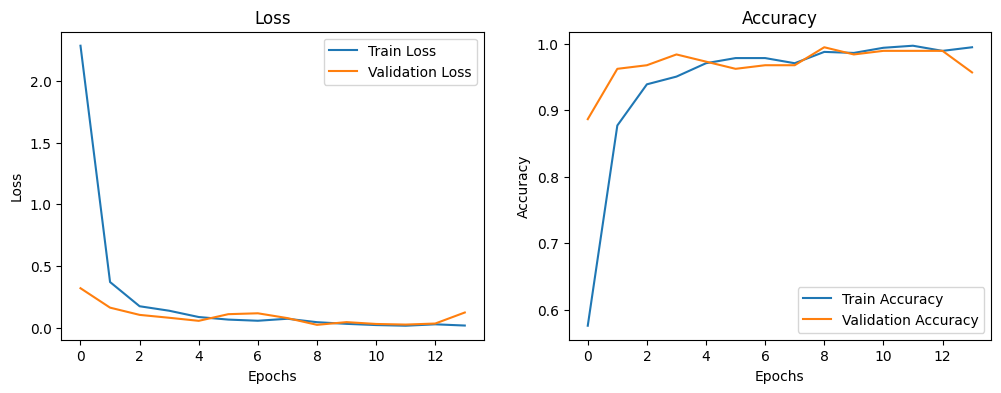

In [2]:
# 훈련, 테스트, 검증 데이터로 7:2:1 비율
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import time
print(tf.config.list_physical_devices('GPU'))
# 데이터 디렉토리 설정
data_directory = '/home/jovyan/mel/'  # 멜 스펙트로그램 데이터 디렉토리 경로

# 이미지 크기 및 하이퍼파라미터 설정
img_height, img_width = 750, 300  # 이미지 크기 설정 (500x200)
batch_size = 64  # 배치 크기 설정
epochs = 100 # 학습 에포크 수 설정
num_classes = 4  # 클래스 수 설정 (총 4개 클래스)

# 클래스 번호 매핑
class_mapping = {'1': 0, '7': 1, '8': 2, '10': 3}

# CNN 모델 정의 함수
def create_cnn_model(input_shape, num_classes):
    """
    CNN 모델 생성 함수
    Args:
    - input_shape: 입력 이미지의 형태 (높이, 너비, 채널 수)
    - num_classes: 분류할 클래스 수
    Returns:
    - Sequential로 구성된 CNN 모델
    """
    model = Sequential([
        Input(shape=input_shape),  # 첫 번째 입력 레이어
        Conv2D(16, (3, 3), activation='relu'),  # 첫 번째 컨볼루션 레이어
        MaxPooling2D((2, 2)),  # 첫 번째 풀링 레이어
        Conv2D(32, (3, 3), activation='relu'),  # 두 번째 컨볼루션 레이어
        MaxPooling2D((2, 2)),  # 두 번째 풀링 레이어
        Conv2D(64, (3, 3), activation='relu'),  # 세 번째 컨볼루션 레이어
        MaxPooling2D((2, 2)),  # 세 번째 풀링 레이어
        Flatten(),  # 평탄화 레이어
        Dense(128, activation='relu'),  # 완전 연결 레이어
        Dropout(0.3),  # 드롭아웃 레이어 (과적합 방지)
        Dense(num_classes, activation='softmax')  # 출력 레이어 (클래스 수만큼 노드)
    ])
    # 모델 컴파일
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])
    return model

# 데이터셋 준비
X_data = []  # 이미지 데이터 배열
y_data = []  # 레이블 배열

# 데이터 디렉토리에서 이미지 파일을 불러와서 리스트에 추가
for filename in os.listdir(data_directory):
    if filename.endswith('.png'):  # PNG 파일만 처리
        # 클래스 번호 추출 (파일명에서 첫 번째 요소를 추출)
        class_number = filename.split('-')[1]
        if class_number in class_mapping:
            # 이미지 파일 경로 설정
            img_path = os.path.join(data_directory, filename)
            # 이미지 불러오기 및 전처리
            img = load_img(img_path, target_size=(img_height, img_width))  # 이미지 로드 및 크기 조정
            img_array = img_to_array(img) / 255.0  # 이미지를 배열로 변환 및 정규화
            X_data.append(img_array)  # 이미지 배열을 X_data 리스트에 추가
            y_data.append(class_mapping[class_number])  # 클래스 번호를 y_data 리스트에 추가

# 리스트를 numpy 배열로 변환
X_data = np.array(X_data)
y_data = np.array(y_data)

# 클래스 번호를 원-핫 인코딩
y_data = to_categorical(y_data, num_classes)

# 7:2:1 비율로 데이터셋 나누기
# stratify 데이터를 클래스 분포 비율을 맞춰 나눠준다
train_data, temp_data, train_labels, temp_labels = train_test_split(X_data, y_data, test_size=0.3, random_state=42, stratify=y_data)
test_data, val_data, test_labels, val_labels = train_test_split(temp_data, temp_labels, test_size=(1/3), random_state=42, stratify=temp_labels)

# CNN 모델 생성
model = create_cnn_model((img_height, img_width, 3), num_classes)

# 체크포인트 정의
checkpoint = ModelCheckpoint("b_model_max.weights.h5",
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max',
                             save_weights_only=True)

# #체크포인트 정의
# checkpoint = ModelCheckpoint("b.weights.h5",
#                              monitor='val_accuracy',
#                              verbose=1,
#                              save_best_only=True,
#                              mode='max',
#                              save_weights_only=True)

# 조기 종료 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 모델 학습
history = model.fit(
    train_data, train_labels,  # 학습 데이터와 레이블
    epochs=epochs,  # 학습 에포크 수
    batch_size=batch_size,  # 배치 크기
    validation_data=(val_data, val_labels),  # 검증 데이터와 레이블
    callbacks=[checkpoint, early_stopping]  # 콜백 추가
)

model.save_weights('b_model_max.weights.h5')

# 모델 평가
test_loss, test_acc = model.evaluate(test_data, test_labels)  # 테스트 데이터로 모델 평가
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")  # 평가 결과 출력

# 결과 출력
print("훈련 데이터 크기:", len(train_data))
print("테스트 데이터 크기:", len(test_data))
print("검증 데이터 크기:", len(val_data))

# 예측 및 성능 평가
Y_pred = model.predict(test_data)  # 테스트 데이터로 예측 수행
y_pred = np.argmax(Y_pred, axis=1)  # 예측된 클래스 라벨
y_true = np.argmax(test_labels, axis=1)  # 실제 클래스 라벨


# 성능 보고서 및 혼동 행렬 출력
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=[str(i) for i in range(num_classes)]))  # 분류 보고서 출력
print("Confusion Matrix:\n")
print(confusion_matrix(y_true, y_pred))  # 혼동 행렬 출력

# 학습 곡선 시각화
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # 손실
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # 정확도
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# 학습 곡선 출력
plot_history(history)

### 코드 쪼개 놓은 것

In [20]:
# 훈련, 테스트, 검증 데이터로 7:2:1 비율
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import time
print(tf.config.list_physical_devices('GPU'))
# 데이터 디렉토리 설정
data_directory = '/home/jovyan/mel/'  # 멜 스펙트로그램 데이터 디렉토리 경로

# 이미지 크기 및 하이퍼파라미터 설정
img_height, img_width = 500, 200  # 이미지 크기 설정 (500x200)
batch_size = 256  # 배치 크기 설정
epochs = 100 # 학습 에포크 수 설정
num_classes = 4  # 클래스 수 설정 (총 4개 클래스)

# 클래스 번호 매핑
class_mapping = {'1': 0, '7': 1, '8': 2, '10': 3}


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
# CNN 모델 정의 함수
def create_cnn_model(input_shape, num_classes):
    """
    CNN 모델 생성 함수
    Args:
    - input_shape: 입력 이미지의 형태 (높이, 너비, 채널 수)
    - num_classes: 분류할 클래스 수
    Returns:
    - Sequential로 구성된 CNN 모델
    """
    model = Sequential([
        Input(shape=input_shape),  # 첫 번째 입력 레이어
        Conv2D(16, (3, 3), activation='relu'),  # 첫 번째 컨볼루션 레이어
        MaxPooling2D((2, 2)),  # 첫 번째 풀링 레이어
        Conv2D(32, (3, 3), activation='relu'),  # 두 번째 컨볼루션 레이어
        MaxPooling2D((2, 2)),  # 두 번째 풀링 레이어
        Conv2D(64, (3, 3), activation='relu'),  # 세 번째 컨볼루션 레이어
        MaxPooling2D((2, 2)),  # 세 번째 풀링 레이어
        Flatten(),  # 평탄화 레이어
        Dense(128, activation='relu'),  # 완전 연결 레이어
        Dropout(0.3),  # 드롭아웃 레이어 (과적합 방지)
        Dense(num_classes, activation='softmax')  # 출력 레이어 (클래스 수만큼 노드)
    ])
    # 모델 컴파일
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])
    return model

In [6]:
# 데이터셋 준비
X_data = []  # 이미지 데이터 배열
y_data = []  # 레이블 배열

# 데이터 디렉토리에서 이미지 파일을 불러와서 리스트에 추가
for filename in os.listdir(data_directory):
    if filename.endswith('.png'):  # PNG 파일만 처리
        # 클래스 번호 추출 (파일명에서 첫 번째 요소를 추출)
        class_number = filename.split('-')[1]
        if class_number in class_mapping:
            # 이미지 파일 경로 설정
            img_path = os.path.join(data_directory, filename)
            # 이미지 불러오기 및 전처리
            img = load_img(img_path, target_size=(img_height, img_width))  # 이미지 로드 및 크기 조정
            img_array = img_to_array(img) / 255.0  # 이미지를 배열로 변환 및 정규화
            X_data.append(img_array)  # 이미지 배열을 X_data 리스트에 추가
            y_data.append(class_mapping[class_number])  # 클래스 번호를 y_data 리스트에 추가

# 리스트를 numpy 배열로 변환
X_data = np.array(X_data)
y_data = np.array(y_data)

# 클래스 번호를 원-핫 인코딩
y_data = to_categorical(y_data, num_classes)

# 7:2:1 비율로 데이터셋 나누기
# stratify 데이터를 클래스 분포 비율을 맞춰 나눠준다
train_data, temp_data, train_labels, temp_labels = train_test_split(X_data, y_data, test_size=0.3, random_state=42, stratify=y_data)
test_data, val_data, test_labels, val_labels = train_test_split(temp_data, temp_labels, test_size=(1/3), random_state=42, stratify=temp_labels)

In [21]:
# CNN 모델 생성
model = create_cnn_model((img_height, img_width, 3), num_classes)


#체크포인트 정의
checkpoint = ModelCheckpoint("b_weights.h5",
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max',
                             save_weights_only=True)

# 조기 종료 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 모델 학습
history = model.fit(
    train_data, train_labels,  # 학습 데이터와 레이블
    epochs=epochs,  # 학습 에포크 수
    batch_size=batch_size,  # 배치 크기
    validation_data=(val_data, val_labels),  # 검증 데이터와 레이블
    callbacks=[checkpoint, early_stopping]  # 콜백 추가
)

model.save('b_model.h5')

# 모델 평가
test_loss, test_acc = model.evaluate(test_data, test_labels)  # 테스트 데이터로 모델 평가
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")  # 평가 결과 출력

# 결과 출력
print("훈련 데이터 크기:", len(train_data))
print("테스트 데이터 크기:", len(test_data))
print("검증 데이터 크기:", len(val_data))

# 예측 및 성능 평가
Y_pred = model.predict(test_data)  # 테스트 데이터로 예측 수행
y_pred = np.argmax(Y_pred, axis=1)  # 예측된 클래스 라벨
y_true = np.argmax(test_labels, axis=1)  # 실제 클래스 라벨


# 성능 보고서 및 혼동 행렬 출력
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=[str(i) for i in range(num_classes)]))  # 분류 보고서 출력
print("Confusion Matrix:\n")
print(confusion_matrix(y_true, y_pred))  # 혼동 행렬 출력

# 학습 곡선 시각화
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # 손실
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # 정확도
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# 학습 곡선 출력
plot_history(history)

Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 12288), dtype=float32). Expected shape (None, 500, 200, 3), but input has incompatible shape (None, 12288)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 12288), dtype=float32)
  • training=True
  • mask=None

# 교차검증 (혼동행렬검증, kfold)

### 교차검증(cnn)

In [9]:
# 모델 평가
test_loss, test_acc = model.evaluate(val_data, val_labels)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

Y_pred = model.predict(val_data)
y_pred = np.argmax(Y_pred, axis=1)
y_true = np.argmax(val_labels, axis=1)

print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=[str(i) for i in range(num_classes)]))
print("Confusion Matrix:\n")
print(confusion_matrix(y_true, y_pred))

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 303ms/step - accuracy: 0.9914 - loss: 0.0261
Test Loss: 0.030448585748672485, Test Accuracy: 0.9891892075538635
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.99      1.00      0.99        66
           2       0.98      0.98      0.98        55
           3       1.00      1.00      1.00        46

    accuracy                           0.99       185
   macro avg       0.99      0.98      0.99       185
weighted avg       0.99      0.99      0.99       185

Confusion Matrix:

[[17  0  1  0]
 [ 0 66  0  0]
 [ 0  1 54  0]
 [ 0  0  0 46]]


### k-fold 교차 검증

In [ ]:
# from sklearn.model_selection import KFold
# k = 10  # 폴드 수 설정
# kf = KFold(n_splits=k, shuffle=True, random_state=42)

# fold_no = 0
# results = []

# for train_index, val_index in kf.split(val_data):
#     print(f'Fold {fold_no}')
    
#     X_train, X_val = X_data[train_index], X_data[val_index]
#     y_train, y_val = y_data[train_index], y_data[val_index]

#     model = create_cnn_model((img_height, img_width, 3), num_classes)
    
#     history = model.fit(
#         X_train, y_train,
#         epochs=epochs,
#         batch_size=batch_size,
#         validation_data=(X_val, y_val)
#     )
    
#     val_loss, val_acc = model.evaluate(X_val, y_val)
#     print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_acc}')
#     results.append((val_loss, val_acc))
    
#     fold_no += 1

# # 교차 검증 결과 출력
# average_val_loss = np.mean([result[0] for result in results])
# average_val_acc = np.mean([result[1] for result in results])
# print(f'Average Validation Loss: {average_val_loss}')
# print(f'Average Validation Accuracy: {average_val_acc}')


In [10]:
from sklearn.model_selection import KFold
import numpy as np

k = 10  # 폴드 수 설정
kf = KFold(n_splits=k, shuffle=True, random_state=42)

fold_no = 1
results = []

for train_index, val_index in kf.split(X_data):
    print(f'Fold {fold_no}')
    
    X_train, X_val = X_data[train_index], X_data[val_index]
    y_train, y_val = y_data[train_index], y_data[val_index]

    model = create_cnn_model((img_height, img_width, 3), num_classes)
    
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val, y_val)
    )
    
    val_loss, val_acc = model.evaluate(X_val, y_val)
    print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_acc}')
    results.append((val_loss, val_acc))
    
    fold_no += 1

# 교차 검증 결과 출력
average_val_loss = np.mean([result[0] for result in results])
average_val_acc = np.mean([result[1] for result in results])
print(f'Average Validation Loss: {average_val_loss}')
print(f'Average Validation Accuracy: {average_val_acc}')


Fold 1
Epoch 1/30
47/49 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6145 - loss: 2.3967

E0000 00:00:1722474172.569219   95291 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1722474172.717223   95291 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1722474173.730861   95291 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1722474174.050264   95291 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


49/49 ━━━━━━━━━━━━━━━━━━━━ 17s 279ms/step - accuracy: 0.6228 - loss: 2.3176 - val_accuracy: 0.8541 - val_loss: 0.3215
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9108 - loss: 0.2470 - val_accuracy: 0.9568 - val_loss: 0.1388
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.9216 - loss: 0.2006 - val_accuracy: 0.9351 - val_loss: 0.1435
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9640 - loss: 0.1042 - val_accuracy: 0.9730 - val_loss: 0.0835
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9789 - loss: 0.0699 - val_accuracy: 0.9676 - val_loss: 0.0891
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.9797 - loss: 0.0566 - val_accuracy: 0.9784 - val_loss: 0.0623
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9913 - loss: 0.0298 - val_accuracy: 0.9622 - val_loss: 0.0893
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9676 - loss: 0.0731 - val_accuracy: 0.9730 - val_loss: 

E0000 00:00:1722474800.100256   95290 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1722474800.248539   95290 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1722474801.213129   95290 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1722474801.514427   95290 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


49/49 ━━━━━━━━━━━━━━━━━━━━ 16s 274ms/step - accuracy: 0.6309 - loss: 1.7409 - val_accuracy: 0.8696 - val_loss: 0.2932
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9206 - loss: 0.2299 - val_accuracy: 0.9293 - val_loss: 0.1437
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9643 - loss: 0.1102 - val_accuracy: 0.9783 - val_loss: 0.0818
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9677 - loss: 0.0953 - val_accuracy: 0.9674 - val_loss: 0.0855
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9706 - loss: 0.0866 - val_accuracy: 0.9837 - val_loss: 0.0499
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9811 - loss: 0.0607 - val_accuracy: 0.9946 - val_loss: 0.0408
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9782 - loss: 0.0584 - val_accuracy: 0.9783 - val_loss: 0.0554
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9923 - loss: 0.0288 - val_accuracy: 0.9783 - val_loss: 

### 기타검증

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 검증 데이터에 대한 예측 수행
y_val_pred = model.predict(val_data)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true = np.argmax(val_labels, axis=1)

# 각 클래스에 대한 정밀도, 재현율, F1 점수 계산
precision = precision_score(y_val_true, y_val_pred_classes, average=None)
recall = recall_score(y_val_true, y_val_pred_classes, average=None)
f1 = f1_score(y_val_true, y_val_pred_classes, average=None)

print("Precision per class:", precision)
print("Recall per class:", recall)
print("F1-score per class:", f1)

# 평균 정밀도, 재현율, F1 점수 계산
precision_avg = precision_score(y_val_true, y_val_pred_classes, average='macro')
recall_avg = recall_score(y_val_true, y_val_pred_classes, average='macro')
f1_avg = f1_score(y_val_true, y_val_pred_classes, average='macro')

print("Average Precision:", precision_avg)
print("Average Recall:", recall_avg)
print("Average F1-score:", f1_avg)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
Precision per class: [1. 1. 1. 1.]
Recall per class: [1. 1. 1. 1.]
F1-score per class: [1. 1. 1. 1.]
Average Precision: 1.0
Average Recall: 1.0
Average F1-score: 1.0


# 다른모델정확성비교

SVM

In [17]:
import os
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import time

# 전체 코드 실행 시작 시간 기록
overall_start_time = time.time()
print(f"시작 시간: {time.ctime(overall_start_time)}")

# 데이터 디렉토리 설정
base_data_directory = '/home/jovyan/mel/'

# 이미지 크기 및 하이퍼파라미터 설정
img_height, img_width = 64, 64  # 이미지 크기를 더 작게 설정하여 메모리 사용량 줄이기
num_classes = 10  # 클래스 수 (예: babycry, boil, carhorn, door, emergencysiren, firesiren, gas, glass, stillsiren)

# 데이터셋 준비
X = []  # 이미지 데이터를 저장할 리스트
y = []  # 클래스 라벨을 저장할 리스트

# 데이터 디렉토리에서 이미지 파일을 불러와서 리스트에 추가
for filename in os.listdir(base_data_directory):
    if filename.endswith('.png'):  # PNG 파일만 처리
        # 클래스 번호 추출 (파일 이름에서 클래스 번호를 추출한다고 가정)
        class_number = int(filename.split('-')[1])
        # 이미지 파일 경로
        img_path = os.path.join(base_data_directory, filename)
        # 이미지 불러오기 및 전처리
        img = load_img(img_path, target_size=(img_height, img_width))  # 이미지 로드 및 크기 조정
        img_array = img_to_array(img) / 255.0  # 이미지를 배열로 변환 및 정규화 (0-1 범위)
        X.append(img_array.flatten())  # 이미지 배열을 평탄화하여 X 리스트에 추가
        y.append(class_number)  # 클래스 번호를 y 리스트에 추가

# 리스트를 numpy 배열로 변환
X = np.array(X)
y = np.array(y)

# 7:2:1 비율로 데이터셋 나누기
# stratify 데이터를 클래스 분포 비율을 맞춰 나눠준다
train_data, temp_data, train_labels, temp_labels = train_test_split(X_data, y_data, test_size=0.3, random_state=42, stratify=y_data)
test_data, val_data, test_labels, val_labels = train_test_split(temp_data, temp_labels, test_size=(1/3), random_state=42, stratify=temp_labels)

# PCA를 사용하여 데이터의 차원을 줄임
n_components = 100  # PCA 차원 수 설정
pca = PCA(n_components=n_components, random_state=42)
X_train_pca = pca.fit_transform(train_data)
X_val_pca = pca.transform(val_data)
X_test_pca = pca.transform(test_data)

# SVM 모델 생성 및 학습
svm_model = SVC(kernel='linear', random_state=42)  # SVM 모델 생성 (선형 커널 사용)
svm_model.fit(X_train_pca, train_labels)  # 학습 데이터로 모델 훈련

# 모델 평가
y_val_pred = svm_model.predict(X_test_pca)  # 검증 데이터로 예측

# 성능 보고서 및 혼동 행렬 출력
print("Classification Report:\n")
print(classification_report(y_val, y_val_pred, target_names=[str(i) for i in range(num_classes)]))  # 분류 보고서 출력
print("Confusion Matrix:\n")
print(confusion_matrix(y_val, y_val_pred))  # 혼동 행렬 출력

# 전체 코드 실행 종료 시간 기록
overall_end_time = time.time()
print(f"종료 시간: {time.ctime(overall_end_time)}")
print(f"소요 시간: {overall_end_time - overall_start_time:.2f}초")


시작 시간: Thu Aug  1 01:56:01 2024


ValueError: Found array with dim 4. PCA expected <= 2.

In [19]:
import os
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import time

# 전체 코드 실행 시작 시간 기록
overall_start_time = time.time()
print(f"시작 시간: {time.ctime(overall_start_time)}")

# 데이터 디렉토리 설정
base_data_directory = '/home/jovyan/mel/'

# 이미지 크기 및 하이퍼파라미터 설정
img_height, img_width = 64, 64  # 이미지 크기를 더 작게 설정하여 메모리 사용량 줄이기
num_classes = 4  # 클래스 수 (예: babycry, boil, carhorn, door, emergencysiren, firesiren, gas, glass, stillsiren)

# 데이터셋 준비
X = []  # 이미지 데이터를 저장할 리스트
y = []  # 클래스 라벨을 저장할 리스트

# 데이터 디렉토리에서 이미지 파일을 불러와서 리스트에 추가
for filename in os.listdir(base_data_directory):
    if filename.endswith('.png'):  # PNG 파일만 처리
        # 클래스 번호 추출 (파일 이름에서 클래스 번호를 추출한다고 가정)
        class_number = int(filename.split('-')[1])
        # 이미지 파일 경로
        img_path = os.path.join(base_data_directory, filename)
        # 이미지 불러오기 및 전처리
        img = load_img(img_path, target_size=(img_height, img_width))  # 이미지 로드 및 크기 조정
        img_array = img_to_array(img) / 255.0  # 이미지를 배열로 변환 및 정규화 (0-1 범위)
        X.append(img_array.flatten())  # 이미지 배열을 평탄화하여 X 리스트에 추가
        y.append(class_number)  # 클래스 번호를 y 리스트에 추가

# 리스트를 numpy 배열로 변환
X = np.array(X)
y = np.array(y)

# 7:2:1 비율로 데이터셋 나누기
# stratify 데이터를 클래스 분포 비율을 맞춰 나눠준다
train_data, temp_data, train_labels, temp_labels = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
test_data, val_data, test_labels, val_labels = train_test_split(temp_data, temp_labels, test_size=(1/3), random_state=42, stratify=temp_labels)

# PCA를 사용하여 데이터의 차원을 줄임
n_components = 100  # PCA 차원 수 설정
pca = PCA(n_components=n_components, random_state=42)
X_train_pca = pca.fit_transform(train_data)
X_val_pca = pca.transform(val_data)
X_test_pca = pca.transform(test_data)

# SVM 모델 생성 및 학습
svm_model = SVC(kernel='linear', random_state=42)  # SVM 모델 생성 (선형 커널 사용)
svm_model.fit(X_train_pca, train_labels)  # 학습 데이터로 모델 훈련

# 모델 평가
y_val_pred = svm_model.predict(X_val_pca)  # 검증 데이터로 예측

# 성능 보고서 및 혼동 행렬 출력
print("Validation Classification Report:\n")
print(classification_report(val_labels, y_val_pred, target_names=[str(i) for i in range(num_classes)]))  # 분류 보고서 출력
print("Validation Confusion Matrix:\n")
print(confusion_matrix(val_labels, y_val_pred))  # 혼동 행렬 출력

# 테스트 데이터에 대한 예측 수행 및 성능 평가
y_test_pred = svm_model.predict(X_test_pca)  # 테스트 데이터로 예측

# 테스트 데이터 성능 보고서 및 혼동 행렬 출력
print("Test Classification Report:\n")
print(classification_report(test_labels, y_test_pred, target_names=[str(i) for i in range(num_classes)]))  # 분류 보고서 출력
print("Test Confusion Matrix:\n")
print(confusion_matrix(test_labels, y_test_pred))  # 혼동 행렬 출력

# 전체 코드 실행 종료 시간 기록
overall_end_time = time.time()
print(f"종료 시간: {time.ctime(overall_end_time)}")
print(f"소요 시간: {overall_end_time - overall_start_time:.2f}초")


시작 시간: Thu Aug  1 02:00:30 2024
Validation Classification Report:



ValueError: Number of classes, 11, does not match size of target_names, 4. Try specifying the labels parameter

RandomForest

In [1]:
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import time

# 전체 코드 실행 시작 시간 기록
overall_start_time = time.time()
print(f"시작 시간: {time.ctime(overall_start_time)}")

# 데이터 디렉토리 설정
base_data_directory = '/home/jovyan/mel/'

# 이미지 크기 및 하이퍼파라미터 설정
img_height, img_width = 128, 128  # 이미지 크기 설정
num_classes = 4  # 클래스 수 (예: babycry, boil, carhorn, door, emergencysiren, firesiren, gas, glass, stillsiren)

# 데이터셋 준비
X = []
y = []

# 데이터 디렉토리에서 이미지 파일을 불러와서 리스트에 추가
for filename in os.listdir(base_data_directory):
    if filename.endswith('.png'):  # PNG 파일만 처리
        # 클래스 번호 추출
        class_number = int(filename.split('-')[1])
        # 이미지 파일 경로
        img_path = os.path.join(base_data_directory, filename)
        # 이미지 불러오기 및 전처리
        img = load_img(img_path, target_size=(img_height, img_width))  # 이미지 로드 및 크기 조정
        img_array = img_to_array(img) / 255.0  # 이미지를 배열로 변환 및 정규화
        X.append(img_array.flatten())  # 이미지 배열을 평탄화하여 X 리스트에 추가
        y.append(class_number)  # 클래스 번호를 y 리스트에 추가

# 리스트를 numpy 배열로 변환
X = np.array(X)
y = np.array(y)

# 7:2:1 비율로 데이터셋 나누기
# stratify 데이터를 클래스 분포 비율을 맞춰 나눠준다
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(1/3), random_state=42, stratify=y_temp)

# 이미지 데이터를 원래 2D 형태로 유지 (공간적 구조를 잃지 않도록)
# Random Forest는 1D 벡터를 입력으로 받으므로, 이미지를 평탄화한 후 사용합니다.
# 그러나 이렇게 하면 공간적 구조를 잃게 됩니다.
# 이를 보완하기 위해 각 픽셀 위치 정보를 특징으로 포함합니다.

# 이미지를 2D 배열 형태로 변환
X_train_reshaped = X_train.reshape(-1, img_height, img_width, 3)
X_val_reshaped = X_val.reshape(-1, img_height, img_width, 3)

# 각 픽셀 위치를 특징으로 변환
# 이미지의 각 픽셀 (i, j)의 RGB 값을 사용하여 특징 벡터를 구성합니다.
X_train_features = np.zeros((X_train.shape[0], img_height * img_width * 3))
X_val_features = np.zeros((X_val.shape[0], img_height * img_width * 3))

# 각 픽셀의 위치를 반영하여 특징 벡터 생성
for i in range(img_height):
    for j in range(img_width):
        for k in range(3):  # RGB 채널
            X_train_features[:, i*img_width*3 + j*3 + k] = X_train_reshaped[:, i, j, k]
            X_val_features[:, i*img_width*3 + j*3 + k] = X_val_reshaped[:, i, j, k]

# Random Forest 모델 생성 및 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_features, y_train)

# 모델 평가
y_val_pred = rf_model.predict(X_val_features)

# 성능 보고서 및 혼동 행렬 출력
print("Classification Report:\n")
print(classification_report(y_val, y_val_pred, target_names=[str(i) for i in range(num_classes)]))
print("Confusion Matrix:\n")
print(confusion_matrix(y_val, y_val_pred))

# 전체 코드 실행 종료 시간 기록
overall_end_time = time.time()
print(f"종료 시간: {time.ctime(overall_end_time)}")
print(f"소요 시간: {overall_end_time - overall_start_time:.2f}초")


2024-08-01 02:43:43.035613: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-01 02:43:43.515801: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-01 02:43:43.659641: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-01 02:43:43.699186: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-01 02:43:44.044074: I tensorflow/core/platform/cpu_feature_guar

시작 시간: Thu Aug  1 02:43:49 2024
Classification Report:



ValueError: Number of classes, 11, does not match size of target_names, 4. Try specifying the labels parameter

In [ ]:
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import time

# 전체 코드 실행 시작 시간 기록
overall_start_time = time.time()
print(f"시작 시간: {time.ctime(overall_start_time)}")

# 데이터 디렉토리 설정
base_data_directory = '/home/jovyan/mel/'

# 이미지 크기 및 하이퍼파라미터 설정
img_height, img_width = 500, 200  # 이미지 크기 설정
num_classes = 4  # 클래스 수 (예: babycry, boil, carhorn, door, emergencysiren, firesiren, gas, glass, stillsiren)

# 데이터셋 준비
X = []
y = []

class_mapping = {'1': 0, '7': 1, '8': 2, '10': 3}

# 데이터 디렉토리에서 이미지 파일을 불러와서 리스트에 추가
for filename in os.listdir(base_data_directory):
    if filename.endswith('.png'):  # PNG 파일만 처리
        # 클래스 번호 추출
        class_number = int(filename.split('-')[1])
        # 이미지 파일 경로
        img_path = os.path.join(base_data_directory, filename)
        # 이미지 불러오기 및 전처리
        img = load_img(img_path, target_size=(img_height, img_width))  # 이미지 로드 및 크기 조정
        img_array = img_to_array(img) / 255.0  # 이미지를 배열로 변환 및 정규화
        X.append(img_array.flatten())  # 이미지 배열을 평탄화하여 X 리스트에 추가
        y.append(class_number)  # 클래스 번호를 y 리스트에 추가

# 리스트를 numpy 배열로 변환
X = np.array(X)
y = np.array(y)

# 7:2:1 비율로 데이터셋 나누기
# stratify 데이터를 클래스 분포 비율을 맞춰 나눠준다
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=(1/3), random_state=42, stratify=y_temp)

# Random Forest 모델 생성 및 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 모델 평가 - 검증 데이터
y_val_pred = rf_model.predict(X_val)

# 성능 보고서 및 혼동 행렬 출력 - 검증 데이터
print("Validation Classification Report:\n")
print(classification_report(y_val, y_val_pred, target_names=[str(i) for i in range(num_classes)]))
print("Validation Confusion Matrix:\n")
print(confusion_matrix(y_val, y_val_pred))

# 모델 평가 - 테스트 데이터
y_test_pred = rf_model.predict(X_test)

# 성능 보고서 및 혼동 행렬 출력 - 테스트 데이터
print("Test Classification Report:\n")
print(classification_report(y_test, y_test_pred, target_names=[str(i) for i in range(num_classes)]))
print("Test Confusion Matrix:\n")
print(confusion_matrix(y_test, y_test_pred))

# 전체 코드 실행 종료 시간 기록
overall_end_time = time.time()
print(f"종료 시간: {time.ctime(overall_end_time)}")
print(f"소요 시간: {overall_end_time - overall_start_time:.2f}초")


시작 시간: Thu Aug  1 02:53:38 2024


In [29]:
import tensorflow as tf
print(tf.__version__)

2.13.0
